# Compare with LazEv

In [1]:
using DSP  # for unwrap
using Interpolations
using LaTeXStrings
using Printf
using Plots, Measures
theme(:wong2)
include("../Utils/misc-tsv.jl")
include("../Utils/misc-tool.jl")

Main.MiscTool

## Time Derivatives of Real Part

2762
2877
874


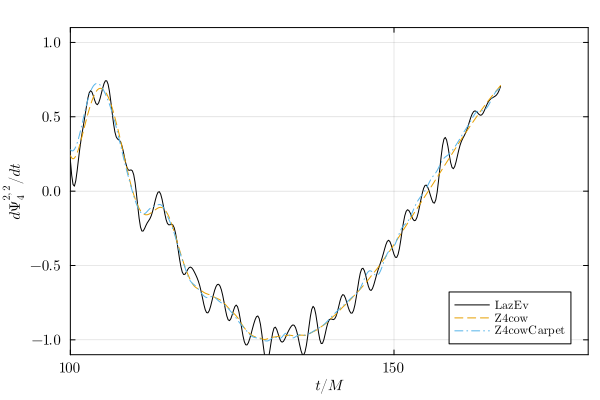

In [13]:
function interp_f_df(dat; n=1)
    x = dat[1]
    y = dat[2]
    f = linear_interpolation(x, y)
    df = linear_interpolation(x, MiscTool.derivs(x, y; n=n))
    return f, df
end
#
let dirsZ, dirsL, fZ, fL, dfZ, dfL
    dirsL = [("LazEv-low/pk_rad_obs_1_psi4_2_2.tl", "LazEv")]
    dirsZ = [("q1-Z4cow-newInitLap-low/Sum/mp_Psi4_l2_m2_r60.00.tsv", "Z4cow")]
    dirsC = [("q1-Z4cowCarpet/Sum/mp_Psi4_l2_m2_r60.00.asc", "Carpet")]
    (datsL, labsL) = MiscTSV.load_data_0d(dirsL; cols=[1, 2, 3], parent_dir="../../data/q1")
    (datsZ, labsZ) = MiscTSV.load_data_0d(dirsZ; cols=[1, 2, 3], parent_dir="../../data/q1")
    (datsC, labsC) = MiscTSV.load_data_0d(dirsC; cols=[1, 2, 3], parent_dir="../../data/q1")
    
    # resample datsL, make it has similar num of data points as Z4cow
    datsL = [[d[1:10:27611] for d in dat] for dat in datsL]
    println(length(datsL[1][1]))
    println(length(datsZ[1][1]))
    println(length(datsC[1][1]))
    
    # Interpolate
    fL, dfL = interp_f_df(datsL[1])
    fZ, dfZ = interp_f_df(datsZ[1])
    fC, dfC = interp_f_df(datsC[1])
    
    # Plot
    plt_dtreal = plot(titlefontsize=10, guidefontsize=10, tickfontsize=10, legendfontsize=8)
    xs = 100:50:450
    xticks!(plt_dtreal, xs, [L"%$(n)" for n in xs])
    
    x0 = datsZ[1][1][1:800]
    plot!(plt_dtreal, x0, -dfL(x0), label=L"\mathrm{LazEv}")
    plot!(plt_dtreal, x0, dfZ(x0), label=L"\mathrm{Z4cow}", linestyle=:dash)
    plot!(plt_dtreal, x0, dfC(x0), label=L"\mathrm{Z4cowCarpet}", linestyle=:dashdot)
    plot!(xlabel=L"t/M", ylabel=L"d\Psi_4^{2,2}/dt", framestyle=:box)
    plot!(plt_dtreal, xlim=(100, 180), ylim=(-1.1e-6,1.1e-6))
    plot!(yaxis=(formatter=(f)->L"%$(round(f * 1e6, digits=1))"), topmargin=0.5cm)
    annotate!(100, 4e-6*1.13, Plots.text(L"\times10^{-6}", 10, :black, :left))
    
    # savefig(plt_dtreal, "GW-derivs.pdf")
    display(plt_dtreal)
end